In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. GEOID Clustering')
cur_date = "012723"

library(readxl)
library(tidyverse)
library(reshape2)
# library(Hmisc)
library(factoextra)

# reading in files
acs_whp_df = data.frame(read_excel("Input/Imputed_ACS_WHP_Data_012723.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# viewing data
head(acs_whp_df)

,GEO_ID,Census_Tract,County,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Sex_Ratio,Median_Age,Population_Under_5,⋯,High_School_Education,Some_College,College_Education,Employed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work,Average_Income_Deficit
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,278233.8,92.23704,1,81-100,87.2,37.3,9.5,⋯,30.1,21.1,0.9,13.9,9.9,17.7,5.4,32.1,28.1,5016
2,14000US37001020200,202.00,Alamance,278233.8,92.23704,1,81-100,78.3,31.0,7.1,⋯,40.0,18.9,12.4,22.5,20.5,24.3,10.6,43.1,43.0,4007
3,14000US37001020300,203.00,Alamance,278233.8,92.23704,1,81-100,77.8,40.7,7.3,⋯,5.9,22.6,4.6,10.3,6.0,14.4,3.9,27.5,32.7,5370
4,14000US37001020400,204.00,Alamance,278233.8,92.23704,1,81-100,78.1,30.5,8.9,⋯,25.3,16.3,5.4,18.9,16.7,20.4,10.9,35.1,38.3,7148
5,14000US37001020501,205.01,Alamance,278233.8,92.23704,1,81-100,92.7,35.1,5.5,⋯,14.9,3.5,1.5,5.4,1.3,9.7,1.5,24.0,14.5,7403
6,14000US37001020502,205.02,Alamance,278233.8,92.23704,1,81-100,99.0,32.1,9.8,⋯,29.9,10.8,5.2,10.0,5.9,15.9,2.2,33.5,41.4,5412


In [3]:
# extracting variables we're interested in
variables_of_interest = c("Population_Over_65", "Race_White", #"Average_Income_Deficit",
                          "Hispanic_Latino", "Population_Under_5", "Wildfire_Hazard_Potential_Mean",
                          "Non_Proficient_English_Speakers", "Poverty_Overall", "Total_Housing_Units", 
                          "College_Education", "Full_Time_Work", "No_Work")

# changing the df from a wide to long format 
longer_acs_whp_df = pivot_longer(acs_whp_df, cols = c(5,8:48), names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% variables_of_interest)
head(longer_acs_whp_df)

GEO_ID,Census_Tract,County,Avg_ACRES,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Variables,Value
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,278233.8,1,81-100,Wildfire_Hazard_Potential_Mean,92.23704
14000US37001020100,201,Alamance,278233.8,1,81-100,Population_Under_5,9.50000
14000US37001020100,201,Alamance,278233.8,1,81-100,Population_Over_65,15.10000
14000US37001020100,201,Alamance,278233.8,1,81-100,Race_White,61.00000
14000US37001020100,201,Alamance,278233.8,1,81-100,Hispanic_Latino,9.50000
14000US37001020100,201,Alamance,278233.8,1,81-100,Non_Proficient_English_Speakers,3.90000


In [7]:
# wide formatted df w/ sociodemographic variables and corresponding geo ids
id_variable_df = reshape2::dcast(longer_acs_whp_df, GEO_ID ~ Variables, value.var = "Value") %>% 
    column_to_rownames("GEO_ID") %>%
    # standardizing data
    scale()

head(id_variable_df)

,College_Education,Full_Time_Work,Hispanic_Latino,No_Work,Non_Proficient_English_Speakers,Population_Over_65,Population_Under_5,Poverty_Overall,Race_White,Total_Housing_Units,Wildfire_Hazard_Potential_Mean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14000US37001020100,0.9,5.4,9.5,28.1,3.9,15.1,9.5,27.2,61.0,2036,92.23704
14000US37001020200,12.4,10.6,28.4,43.0,16.0,11.2,7.1,33.2,51.9,1796,92.23704
14000US37001020300,4.6,3.9,44.1,32.7,19.3,18.9,7.3,23.7,45.2,3033,92.23704
14000US37001020400,5.4,10.9,21.0,38.3,10.1,10.1,8.9,31.8,19.6,2707,92.23704
14000US37001020501,1.5,1.5,14.5,14.5,9.9,15.6,5.5,13.6,76.1,1670,92.23704
14000US37001020502,5.2,2.2,23.5,41.4,13.2,8.9,9.8,24.4,40.7,1573,92.23704


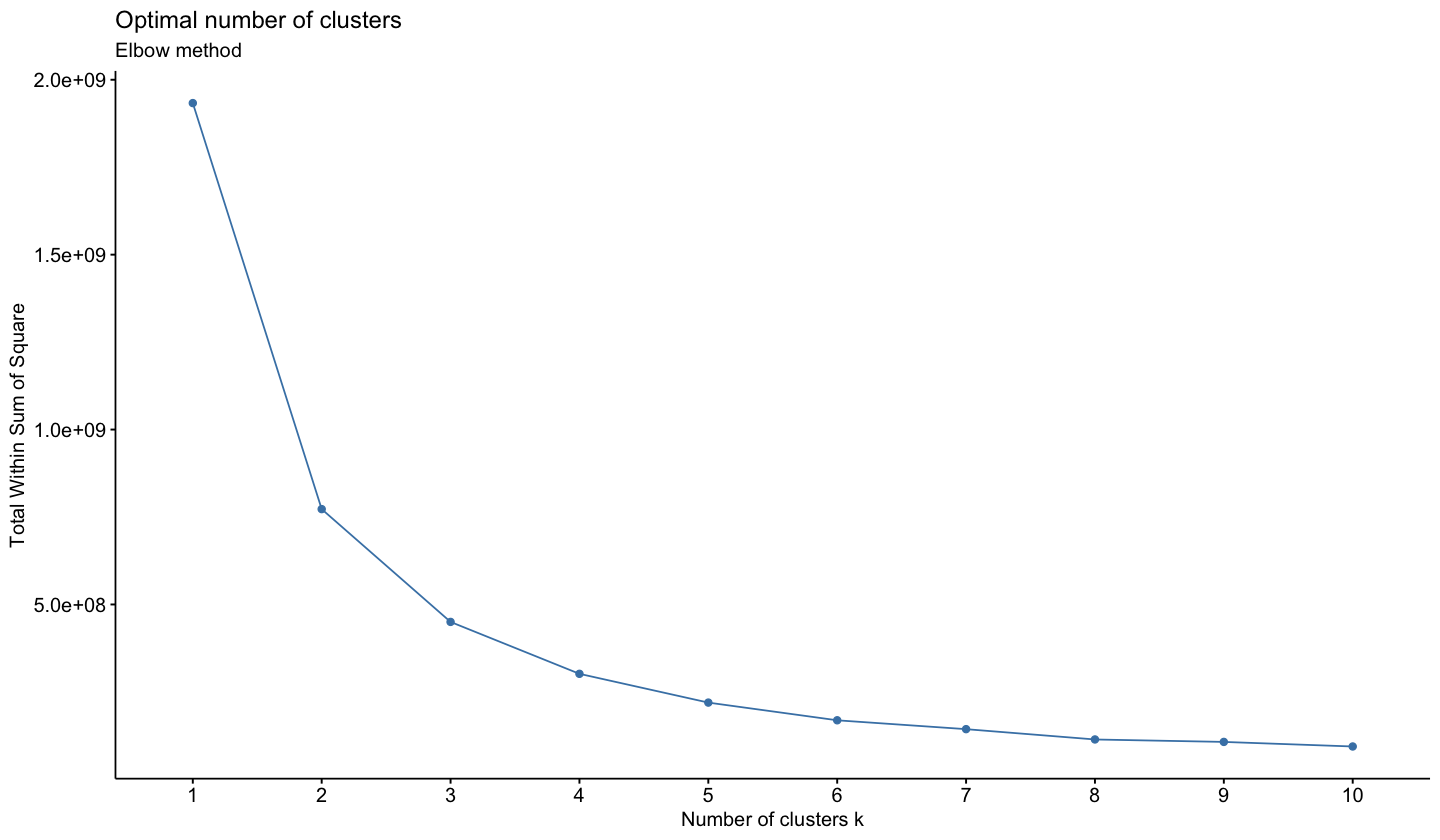

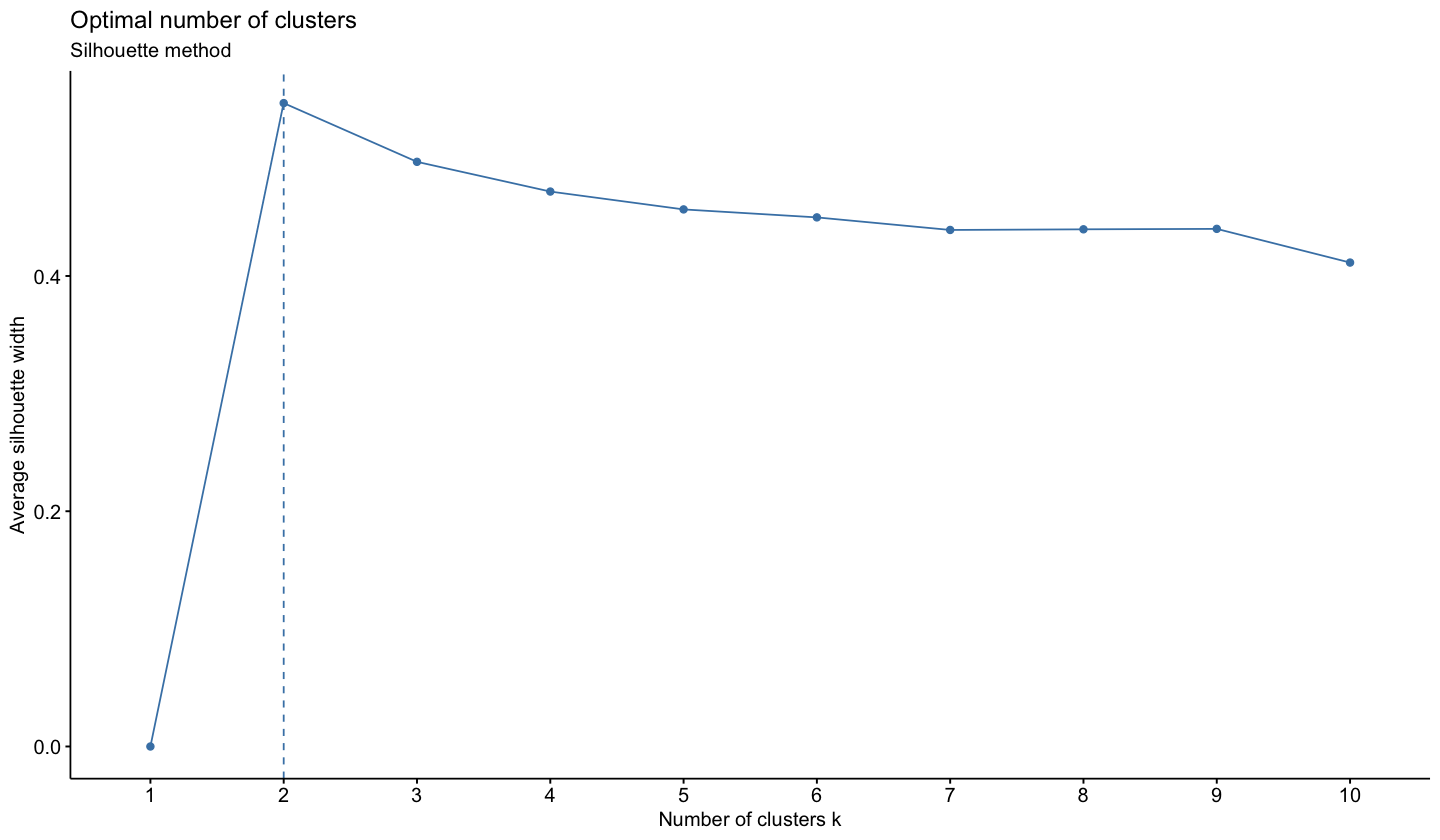

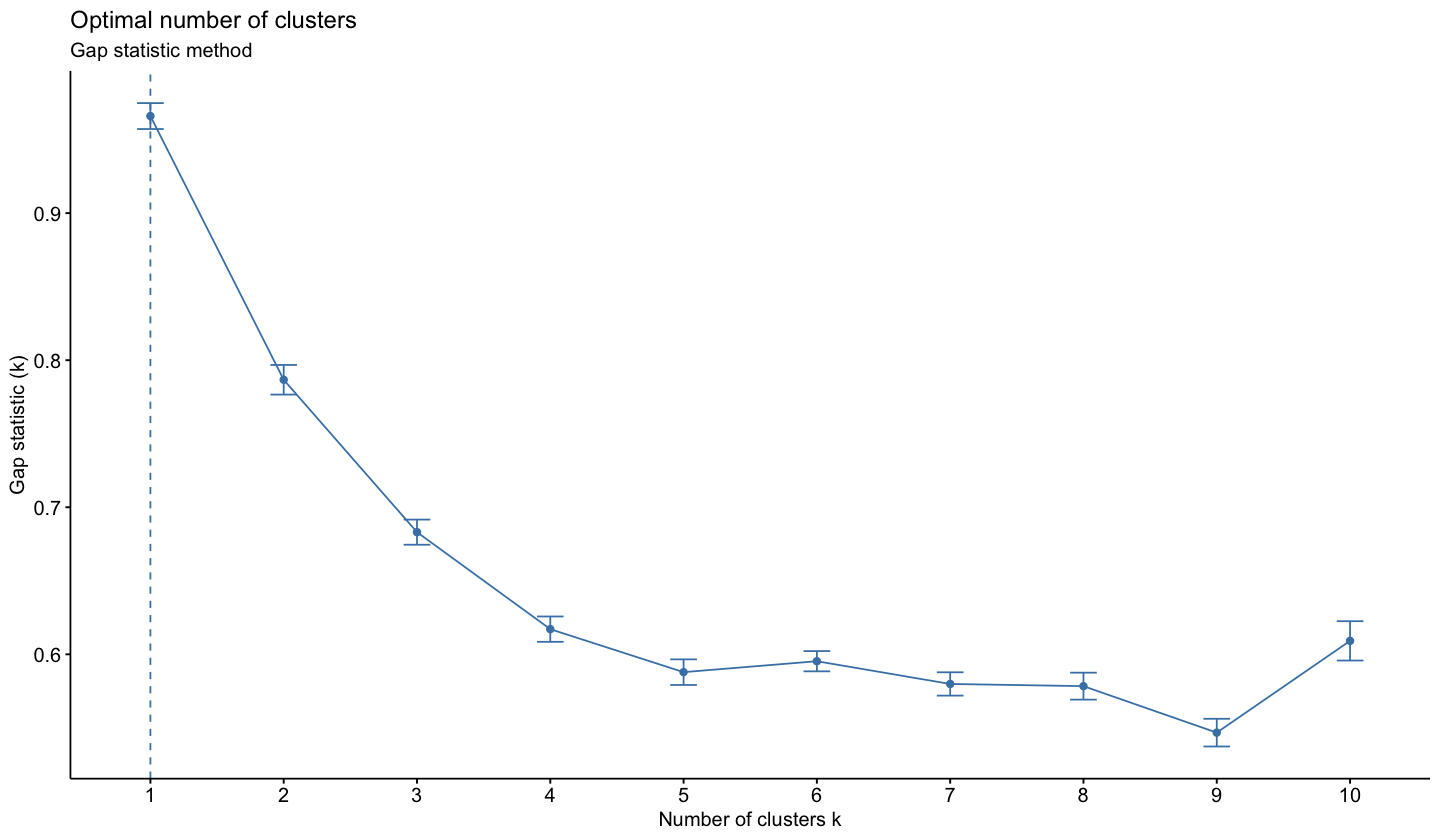

In [10]:
# determining optimal number of clusters using 3 different methods: wss, silhoutte, and gapstat
fviz_nbclust(id_variable_df, kmeans, method = "wss") +
  labs(subtitle = "Elbow method") # suggests 8??
fviz_nbclust(id_variable_df, kmeans, method = "silhouette") + 
  labs(subtitle = "Silhouette method") # suggests 2
fviz_nbclust(id_variable_df, kmeans, method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method") # suggests 1

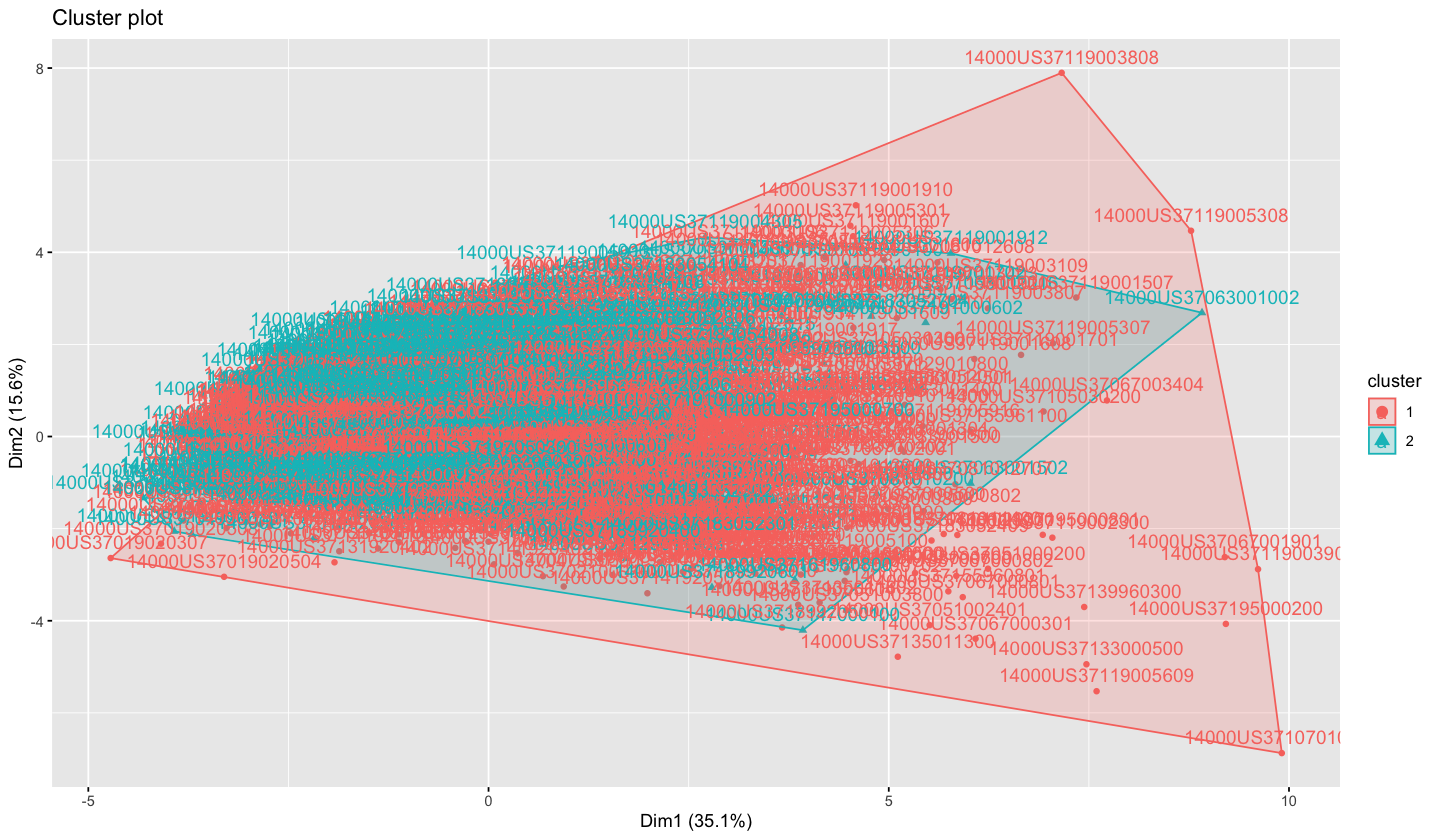

In [9]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
geoids_kmeans = kmeans(id_variable_df, centers = 2, nstart = 25)
fviz_cluster(geoids_kmeans, data = id_variable_df) 